In [ ]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm
from scipy import stats
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version

path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Korrelation Alter ↔ Betrag:
 Pearson : -0.0097
 Spearman: -0.0235
 Kendall : -0.0156


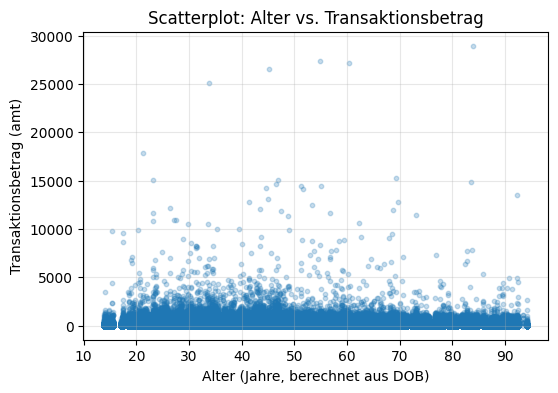

In [ ]:
# Alter berechnen
ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")
age = (pd.Timestamp("2019-01-01") - ds["dob"]).dt.days / 365.25

# Korrelationen berechnen
pearson_corr  = age.corr(ds["amt"], method="pearson")
spearman_corr = age.corr(ds["amt"], method="spearman")
kendall_corr  = age.corr(ds["amt"], method="kendall")

print("Korrelation Alter ↔ Betrag:")
print(f" Pearson : {pearson_corr: .4f}")
print(f" Spearman: {spearman_corr: .4f}")
print(f" Kendall : {kendall_corr: .4f}")

# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(age, ds["amt"], alpha=0.25, s=10)
plt.title("Scatterplot: Alter vs. Transaktionsbetrag")
plt.xlabel("Alter (Jahre, berechnet aus DOB)")
plt.ylabel("Transaktionsbetrag (amt)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)
 Pearson :  0.0058
 Spearman: -0.0236
 Kendall : -0.0157


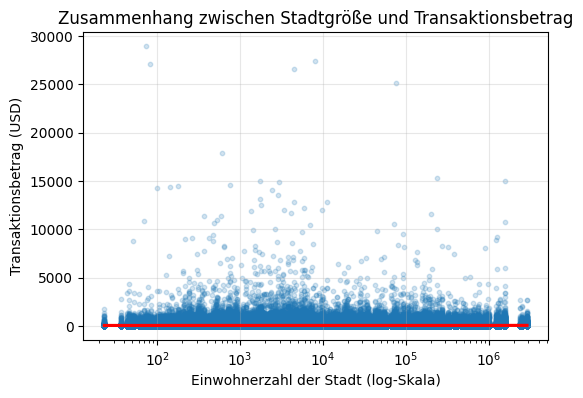

In [ ]:
# Korrelationen berechne
pearson  = ds["city_pop"].corr(ds["amt"], method="pearson")
spearman = ds["city_pop"].corr(ds["amt"], method="spearman")
kendall  = ds["city_pop"].corr(ds["amt"], method="kendall")

print("Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(6,4))
sns.regplot(
    x="city_pop", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10}, 
    line_kws={"color":"red"}
)
plt.xscale("log")   # log-Skala, da city_pop stark variiert (kleine & große Städte)
plt.title("Zusammenhang zwischen Stadtgröße und Transaktionsbetrag")
plt.xlabel("Einwohnerzahl der Stadt (log-Skala)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Betrag (amt) ↔ Zeit (unix_time)
 Pearson : -0.0003
 Spearman:  0.0006
 Kendall :  0.0004


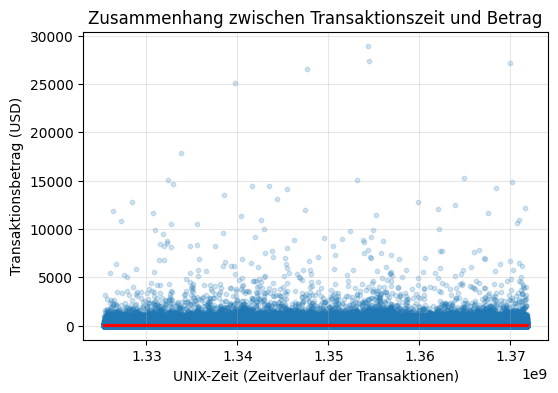

In [ ]:
# Korrelationen berechnen
pearson  = ds["amt"].corr(ds["unix_time"], method="pearson")
spearman = ds["amt"].corr(ds["unix_time"], method="spearman")
kendall  = ds["amt"].corr(ds["unix_time"], method="kendall")

print("Korrelation Betrag (amt) ↔ Zeit (unix_time)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(6,4))
sns.regplot(
    x="unix_time", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10},
    line_kws={"color":"red"}
)
plt.title("Zusammenhang zwischen Transaktionszeit und Betrag")
plt.xlabel("UNIX-Zeit (Zeitverlauf der Transaktionen)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Betrag (amt) ↔ Alter (dob)
 Pearson : -0.0097
 Spearman: -0.0235
 Kendall : -0.0156


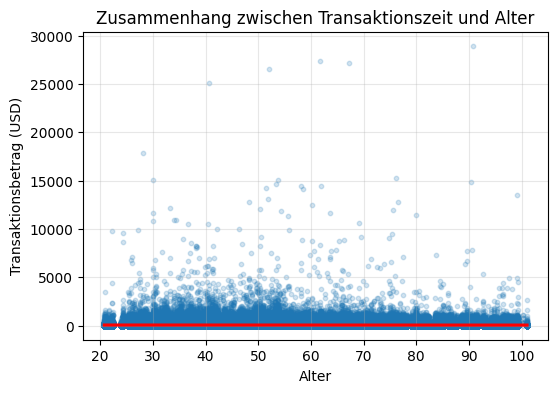

In [ ]:
from datetime import date
# Korrelationen berechnen
ds["dob"] = pd.to_datetime(ds["dob"])
ds["age"] = (pd.Timestamp(date.today()) - ds["dob"]).dt.days / 365.25
pearson  = ds["amt"].corr(ds["age"], method="pearson")
spearman = ds["amt"].corr(ds["age"], method="spearman")
kendall  = ds["amt"].corr(ds["age"], method="kendall")

print("Korrelation Betrag (amt) ↔ Alter (dob)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(6,4))
sns.regplot(
    x="age", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10},
    line_kws={"color":"red"}
)
plt.title("Zusammenhang zwischen Transaktionszeit und Alter")
plt.xlabel("Alter")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
numeric_ds = ds.select_dtypes(include='number')

# Scatterplot matrix
pd.plotting.scatter_matrix(numeric_ds, alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.show()

KeyboardInterrupt: 

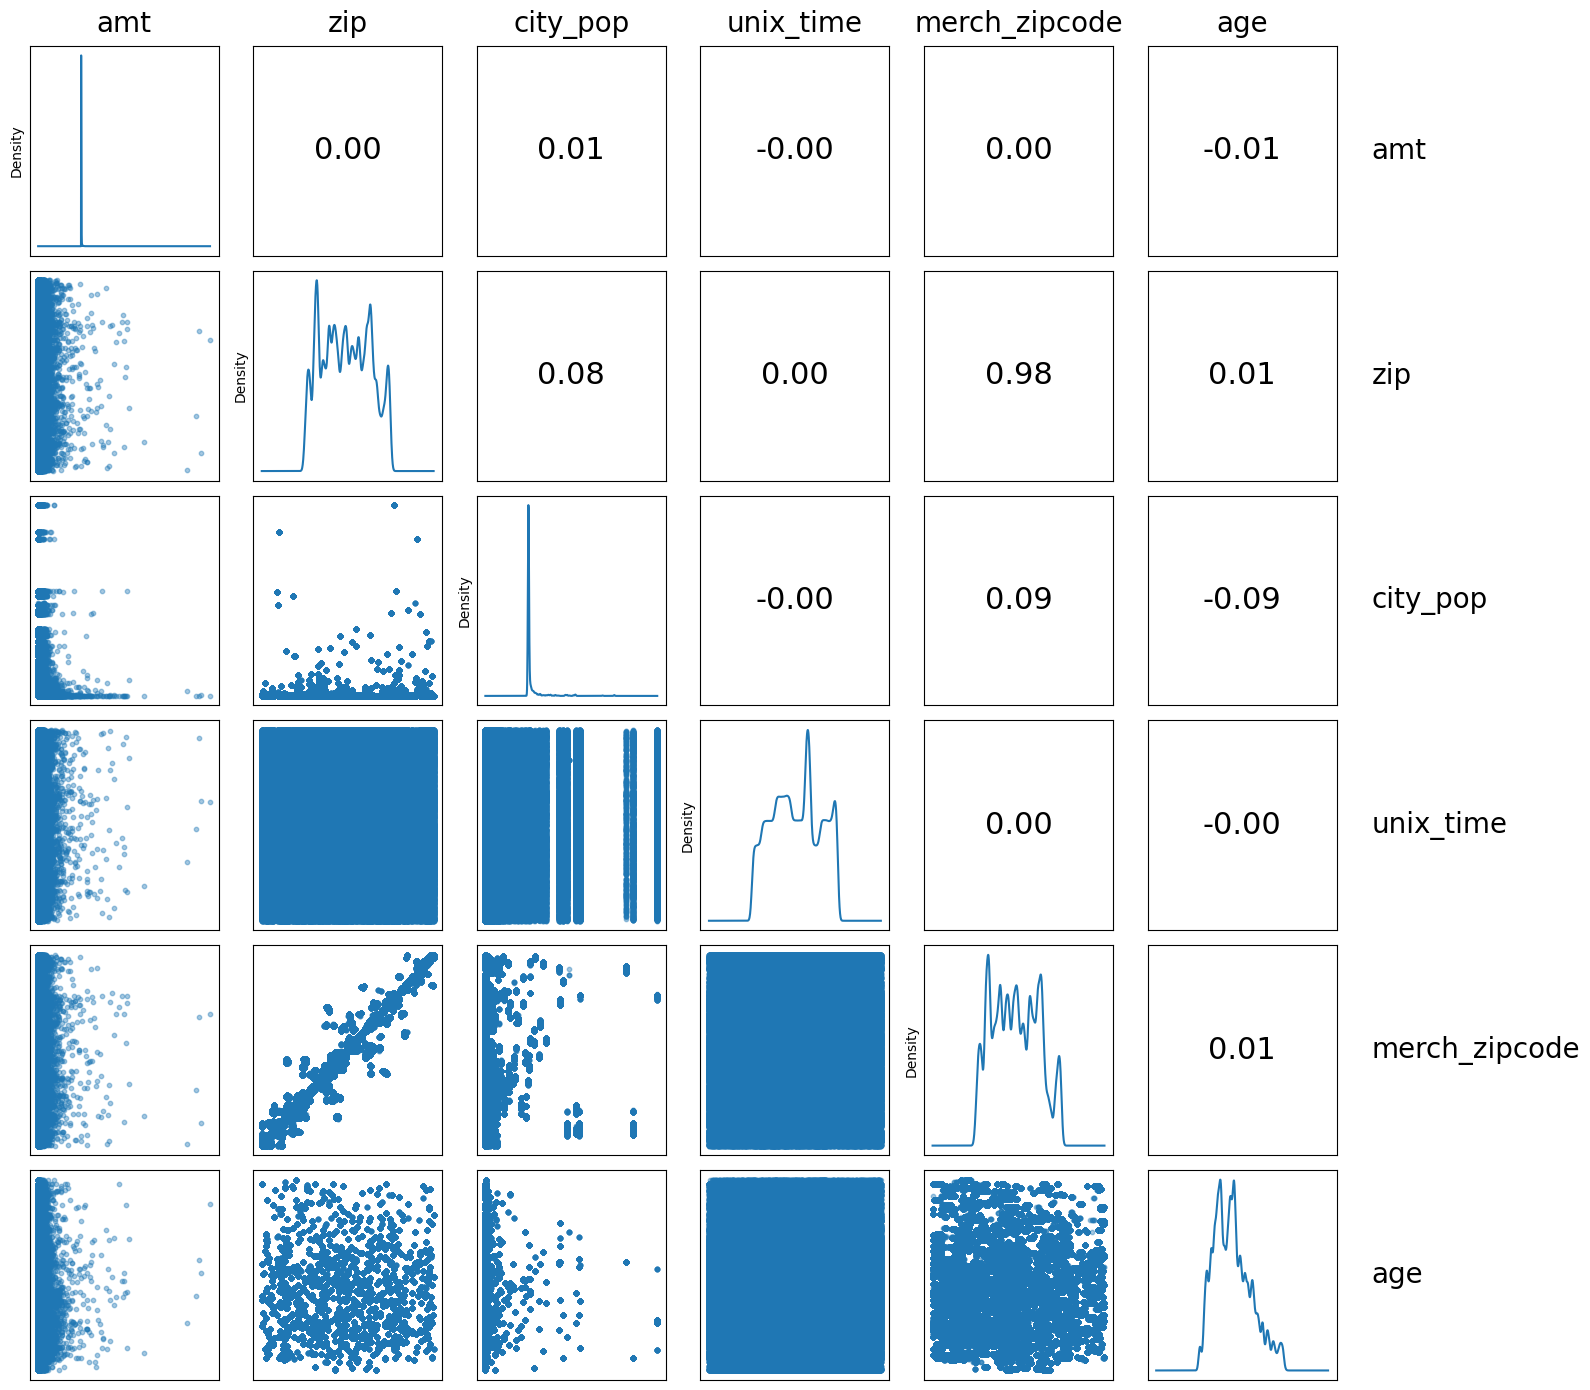

In [ ]:
numeric_ds = ds.select_dtypes(include='number')

numeric_ds.drop(columns=["Unnamed: 0","cc_num","lat","long","merch_lat","merch_long","is_fraud"], inplace=True)

num_cols = numeric_ds.select_dtypes(include='number').columns
n = len(num_cols)

fig, axes = plt.subplots(n, n, figsize=(16, 14))

for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):
        ax = axes[i, j]
        
        # Untere Dreiecksmatrix: Scatterplots
        if i > j:
            ax.scatter(numeric_ds[col2], numeric_ds[col1], alpha=0.4, s=10)
        
        # Obere Dreiecksmatrix: Korrelationswerte
        elif i < j:
            corr = numeric_ds[col1].corr(numeric_ds[col2])
            ax.text(0.5, 0.5, f'{corr:.2f}', ha='center', va='center', fontsize=22)
        
        # Diagonale: KDE-Dichtekurve mit Pandas
        else:
            numeric_ds[col1].plot(kind='kde', ax=ax, lw=1.5)
        
        # Achsen ausblenden für Übersicht
        ax.set_xticks([])
        ax.set_yticks([])

        # Nur äußere Beschriftungen beibehalten
        if i < n - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

# Spaltennamen oben
for j, col in enumerate(num_cols):
    axes[0, j].set_title(col, fontsize=20, pad=10)

# Zeilennamen rechts
for i, col in enumerate(num_cols):
    axes[i, -1].yaxis.set_label_position("right")
    axes[i, -1].set_ylabel(col, rotation=0, labelpad=25, fontsize=20, horizontalalignment='left',va='center')

plt.tight_layout()
plt.show()

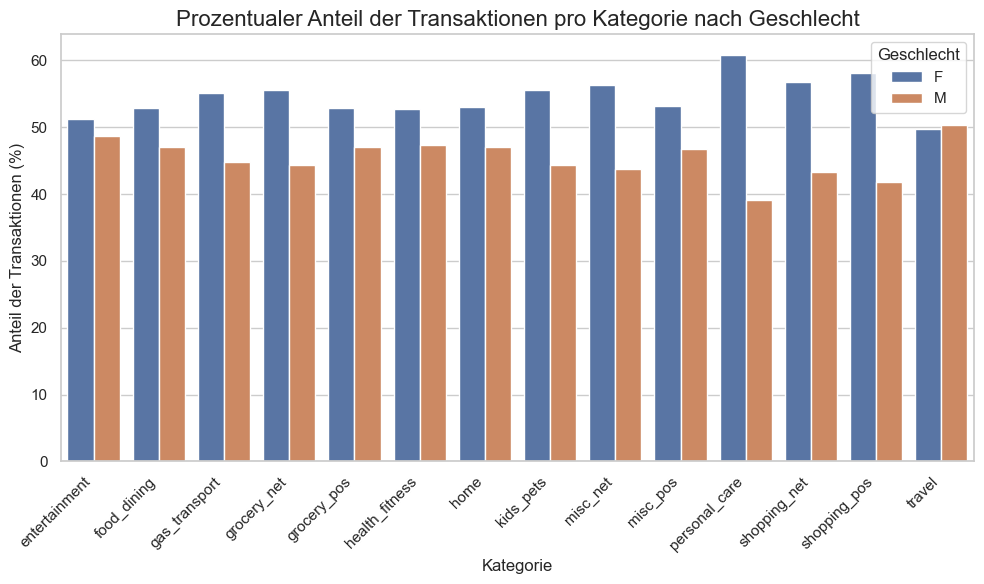

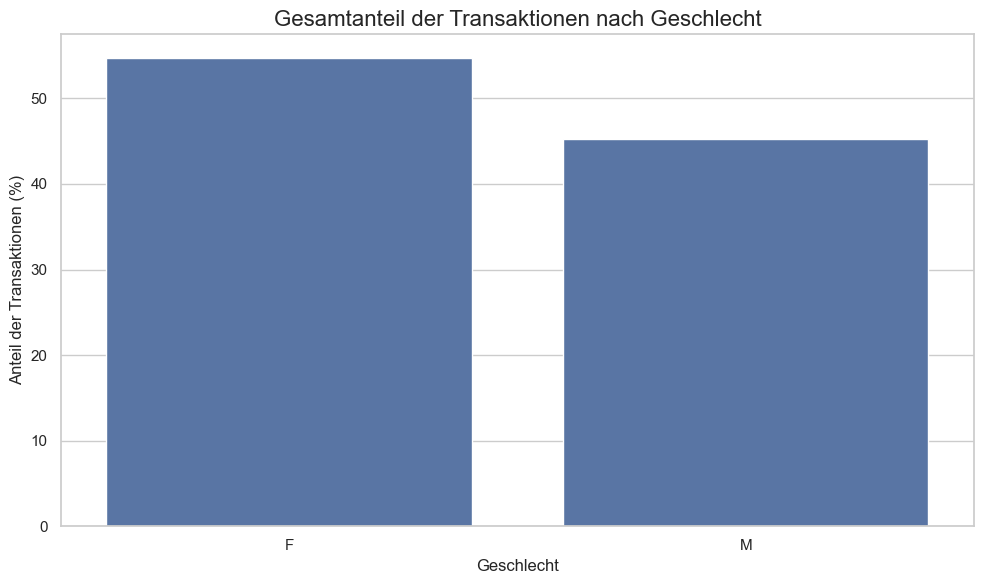

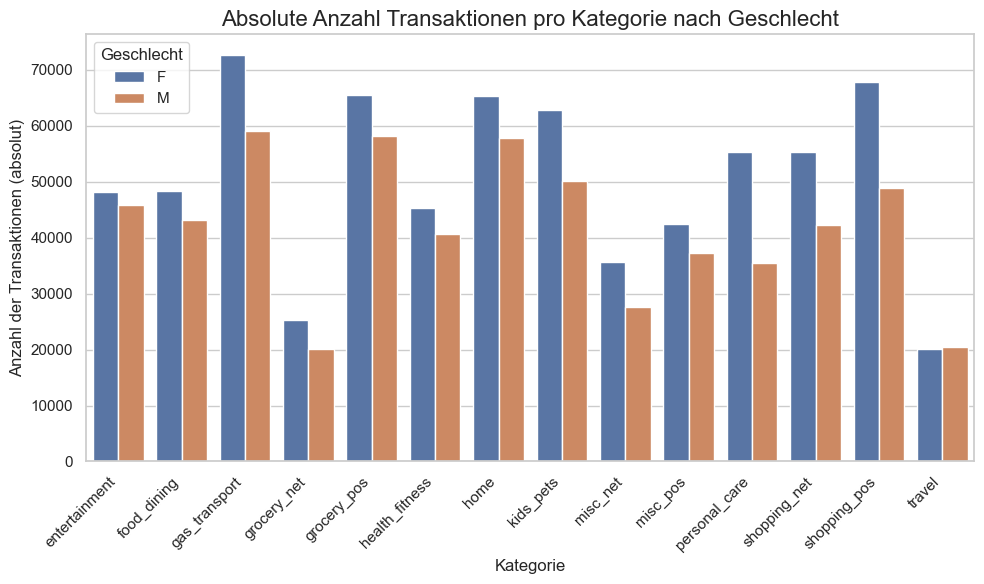

In [7]:
sns.set(style="whitegrid")

# Gruppieren nach Kategorie und Geschlecht und Anzahl zählen
category_gender_counts = ds.groupby(['category', 'gender']).size().reset_index(name='count')

# Prozentanteile pro Kategorie berechnen
category_totals = category_gender_counts.groupby('category')['count'].transform('sum')
category_gender_counts['percent'] = category_gender_counts['count'] / category_totals * 100

# Balkendiagramm mit Prozentwerten erstellen
plt.figure()
sns.barplot(x='category', y='percent', hue='gender', data=category_gender_counts)

# Diagramm anpassen
plt.title("Prozentualer Anteil der Transaktionen pro Kategorie nach Geschlecht", fontsize=16)
plt.xlabel("Kategorie", fontsize=12)
plt.ylabel("Anteil der Transaktionen (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geschlecht')
plt.tight_layout()

# Gesamtprozentwerte nach Geschlecht berechnen
gender_counts = ds.groupby("gender").size().reset_index(name="count")
gender_counts['percent'] = gender_counts['count'] / gender_counts['count'].sum() * 100

# Gesamtvergleich als Prozentwerte
plt.figure()
sns.barplot(x='gender', y='percent', data=gender_counts)
plt.title("Gesamtanteil der Transaktionen nach Geschlecht", fontsize=16)
plt.xlabel("Geschlecht", fontsize=12)
plt.ylabel("Anteil der Transaktionen (%)", fontsize=12)
plt.tight_layout()

plt.figure()
sns.barplot(x='category', y='count', hue='gender', data=category_gender_counts)

# Diagramm anpassen
plt.title("Absolute Anzahl Transaktionen pro Kategorie nach Geschlecht", fontsize=16)
plt.xlabel("Kategorie", fontsize=12)
plt.ylabel("Anzahl der Transaktionen (absolut)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geschlecht')
plt.tight_layout()

plt.show()

Es gibt kein Simpson Paradox bzgl. der Transaktionen nach Geschlecht stratifiziert nach Kategorie verglichen zur gesamten Transaktionsverteilung zwischen Mann und Frau. Einzig bei der Kategorie 'travel' hatten die Männer minimal mehr Transaktionen.